In [1]:
import tensorflow as tf
import mitdeeplearning as mdl
import numpy as np
import os, time, functools
from IPython import display as ipythondisplay
from tqdm import tqdm

In [2]:
songs = mdl.lab1.load_training_data()
example_song = songs[0]
print("\nExample Song: ")
print(example_song)

Found 817 songs in text

Example Song: 
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!


In [4]:
mdl.lab1.play_song(example_song)

In [7]:
songs_joined = "\n\n".join(songs)
vocab = sorted(set(songs_joined))
print("There are", len(vocab), "unique characters in the dataset")

There are 83 unique characters in the dataset


In [8]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '<': 23, '=': 24, '>': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, '[': 52, ']': 53, '^': 54, '_': 55, 'a': 56, 'b': 57, 'c': 58, 'd': 59, 'e': 60, 'f': 61, 'g': 62, 'h': 63, 'i': 64, 'j': 65, 'k': 66, 'l': 67, 'm': 68, 'n': 69, 'o': 70, 'p': 71, 'q': 72, 'r': 73, 's': 74, 't': 75, 'u': 76, 'v': 77, 'w': 78, 'x': 79, 'y': 80, 'z': 81, '|': 82}


In [15]:
print('{')
for char, _ in zip(char2idx,range(20)):
    print('  {:4s}: {:2d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':  0,
  ' ' :  1,
  '!' :  2,
  '"' :  3,
  '#' :  4,
  "'" :  5,
  '(' :  6,
  ')' :  7,
  ',' :  8,
  '-' :  9,
  '.' : 10,
  '/' : 11,
  '0' : 12,
  '1' : 13,
  '2' : 14,
  '3' : 15,
  '4' : 16,
  '5' : 17,
  '6' : 18,
  '7' : 19,
  ...
}


In [16]:
def vectorize_string(string):
    vectorized_output = np.array([char2idx[char] for char in string])
    return vectorized_output

vectorized_songs = vectorize_string(songs_joined)

In [31]:
print("\nSong 1 in String:\n", "-"*50)
print(songs[0])
print("\nSong 1 in Vectors:\n", "-"*50)
print(vectorized_songs[:253])


Song 1 in String:
 --------------------------------------------------
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!

Song 1 in Vectors:
 --------------------------------------------------
[49 22 13  0 45 22 26 67 60 79 56 69 59 60 73  5 74  0 51 22  1 64 59 22
 59 58  9 63 70 73 69 71 64 71 60  9 13  0 38 22 28 82  0 37 22 13 11 20
  0 36 22 29  1 38 56 65 70 73  0  6 15 26 27 58 82 59 26 31 26  1 29 31
 26 59 82 61 59 58 59  1 31 26 59 61 82 62 61 62 60  1 61 60 61 59 82  6
 15 60 61 60  1  6 15 59 58 27  1 26 14  1  6 15 26 27 58 82  2  0 59 26
 31 26  1 29 31 26 59 82 61 59 58 59  1 31 26 59 61 82 62 61 62 60  1 61
 60 61 59 82  6 15 60 61 60  1 59 58  1 59 14 22 82  2  0 26 32 82 31 26
 59 26  1 31 26 59 26 82 32 27 59 27  1 32 27 59 27 82 26 58 60 58  1 26
 58 60 58 82 59 61 5

In [32]:
assert isinstance(vectorized_songs, np.ndarray)

In [33]:
def get_batch(vectorized_songs, seq_length, batch_size):
    n = vectorized_songs.shape[0] - 1
    idx = np.random.choice(n-seq_length, batch_size)
    
    input_batch = [vectorized_songs[i: i+seq_length] for i in idx]
    output_batch = [vectorized_songs[i+1: i+seq_length+1] for i in idx]
    x_batch = np.reshape(input_batch, [batch_size, seq_length])
    y_batch = np.reshape(output_batch, [batch_size, seq_length])
    return x_batch, y_batch

In [34]:
test_args = (vectorized_songs, 10, 2)
if not mdl.lab1.test_batch_func_types(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_shapes(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_next_step(get_batch, test_args):
    print("======\n[FAIL] could not pass tests")
else: 
    print("======\n[PASS] passed all tests!")

[PASS] test_batch_func_types
[PASS] test_batch_func_shapes
[PASS] test_batch_func_next_step
[PASS] passed all tests!


In [46]:
x_batch, y_batch = get_batch(vectorized_songs, seq_length=10, batch_size=1)
for i, (input_idx, target_idx) in enumerate(zip(np.squeeze(x_batch),np.squeeze(y_batch))):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))    

Step   0
  input: 26 ('A')
  expected output: 82 ('|')
Step   1
  input: 82 ('|')
  expected output: 27 ('B')
Step   2
  input: 27 ('B')
  expected output: 26 ('A')
Step   3
  input: 26 ('A')
  expected output: 59 ('d')
Step   4
  input: 59 ('d')
  expected output: 27 ('B')
Step   5
  input: 27 ('B')
  expected output: 1 (' ')
Step   6
  input: 1 (' ')
  expected output: 26 ('A')
Step   7
  input: 26 ('A')
  expected output: 27 ('B')
Step   8
  input: 27 ('B')
  expected output: 59 ('d')
Step   9
  input: 59 ('d')
  expected output: 60 ('e')


In [47]:
def LSTM(rnn_units):
    return tf.keras.layers.LSTM(
    rnn_units,
    return_sequences=True,
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True
    )

In [48]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size,None]),
        LSTM(rnn_units),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [49]:
model = build_model(len(vocab),embedding_dim=256, rnn_units=1024,batch_size=32)

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (32, None, 256)           21248     
_________________________________________________________________
lstm (LSTM)                  (32, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (32, None, 83)            85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [62]:
x, y = get_batch(vectorized_songs, seq_length=5, batch_size=32)
pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       (32, 5)  # (batch_size, sequence_length)
Prediction shape:  (32, 5, 83) # (batch_size, sequence_length, vocab_size)


In [63]:
print(pred.shape)

(32, 5, 83)


In [64]:
sampled_indices = tf.random.categorical(pred[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
sampled_indices

array([59, 38, 51, 54, 44], dtype=int64)

In [65]:
print("Input: \n", repr("".join(idx2char[x[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))


Input: 
 'G|]!\n'

Next Char Predictions: 
 'dMZ^S'


In [66]:
def compute_loss(labels, logits):
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
    return loss

In [67]:
example_batch_loss = compute_loss(y, pred)

In [68]:
print("Prediction shape: ", pred.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (32, 5, 83)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4189825


In [69]:
num_training_iterations = 2000
batch_size = 4
seq_length = 100
learning_rate = 5e-3
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

In [70]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size)
optimizer = tf.keras.optimizers.Adam(learning_rate)

In [71]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = compute_loss(y, y_hat)
    grads = tape.gradient(loss, model.trainable_variables) 
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss    

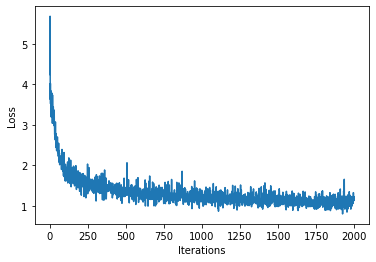

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [1:23:17<00:00,  2.50s/it]


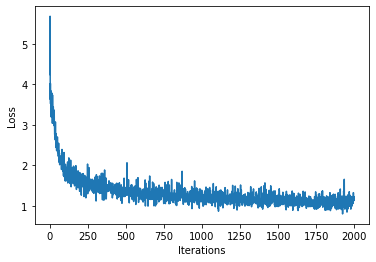

In [72]:
history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() 
for iter in tqdm(range(num_training_iterations)):
    x_batch, y_batch = get_batch(vectorized_songs, seq_length, batch_size)
    loss = train_step(x_batch, y_batch)
    history.append(loss.numpy().mean())
    plotter.plot(history)
    if iter % 100 == 0:     
        model.save_weights(checkpoint_prefix)
model.save_weights(checkpoint_prefix)

In [73]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            21248     
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_2 (Dense)              (1, None, 83)             85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [74]:
def generate_text(model, start_string, generation_length=1000):
        input_eval = [char2idx[s] for s in start_string]
        input_eval = tf.expand_dims(input_eval, 0)
        text_generated = []
        model.reset_states()
        tqdm._instances.clear()
        for i in tqdm(range(generation_length)):
            predictions = model(input_eval)
            predictions = tf.squeeze(predictions, 0)
            predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
            input_eval = tf.expand_dims([predicted_id], 0)
            text_generated.append(idx2char[predicted_id])
        return (start_string + ''.join(text_generated))

In [75]:
generated_text = generate_text(model, start_string="X", generation_length=1000)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.51it/s]


In [76]:
generated_songs = mdl.lab1.extract_song_snippet(generated_text)
for i, song in enumerate(generated_songs):
    waveform = mdl.lab1.play_song(song)
    if waveform:
        print("Generated song", i)
        ipythondisplay.display(waveform)

Found 0 songs in text
